In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from pprint import pprint
from random import randint, uniform, gauss
import numpy as np
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))
set1 = cm.get_cmap(plt.get_cmap('Set1'))

def tableau20(color):
    # Use coordinated colors. These are the "Tableau 20" colors as
    # RGB. Each pair is strong/light. For a theory of color
    tableau20 = [(31 , 119, 180), (174, 199, 232), # blue        [ 0,1 ]
                 (255, 127, 14 ), (255, 187, 120), # orange      [ 2,3 ]
                 (44 , 160, 44 ), (152, 223, 138), # green       [ 4,5 ]
                 (214, 39 , 40 ), (255, 152, 150), # red         [ 6,7 ]
                 (148, 103, 189), (197, 176, 213), # purple      [ 8,9 ]
                 (140, 86 , 75 ), (196, 156, 148), # brown       [10,11]
                 (227, 119, 194), (247, 182, 210), # pink        [12,13]
                 (188, 189, 34 ), (219, 219, 141), # yellow      [14,15]
                 (23 , 190, 207), (158, 218, 229), # cyan        [16,17]
                 (65 , 68 , 81 ), (96 , 99 , 106), # gray        [18,19]
                 (127, 127, 127), (143, 135, 130), # gray        [20,21]
                 (165, 172, 175), (199, 199, 199), # gray        [22,23]
                 (207, 207, 207)]                   # gray        [24]
    # Scale the RGB values to the [0, 1] range, which is the format
    # matplotlib accepts.
    r, g, b = tableau20[color]
    return (round(r/255.,1), round(g/255.,1), round(b/255.,1))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
workflows = pd.read_csv('../Data/heterogeneous_campaign.csv')

In [3]:
workflows

,description,id,num_oper
0,NaN,1.0,68058.329307
1,NaN,2.0,76254.765551
2,NaN,3.0,83632.361876
3,NaN,4.0,76818.034915
4,NaN,5.0,78412.038919
...,...,...,...
2043,NaN,2044.0,70426.879371
2044,NaN,2045.0,86428.397110
2045,NaN,2046.0,79156.143658
2046,NaN,2047.0,71282.941319


In [4]:
print(workflows['num_oper'].mean(), workflows['num_oper'].std())

75211.7686800252 5998.602731757247


In [7]:
for i in range(1024,2048):
    workflows.loc[len(workflows)] = [None, i + 1, gauss(75000, 6000)]


In [10]:
workflows.to_csv('../Data/heterogeneous_campaign.csv', index=False)

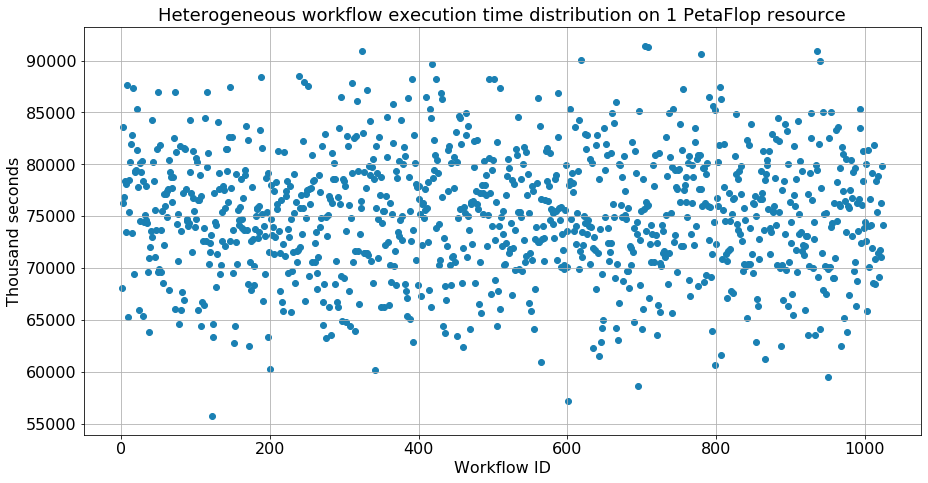

In [4]:
fig, axis = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(15,7.5)
_ = axis.scatter(range(1,1025), workflows['num_oper'],color=tableau20(0))
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=16)
_ = axis.set_yticklabels((axis.get_yticks()).astype('int').tolist(),fontsize=16)
_ = axis.set_xlabel('Workflow ID', fontsize=16)
_ = axis.set_ylabel('Thousand seconds', fontsize=16)
_ = axis.grid('on')
_ = axis.set_title('Heterogeneous workflow execution time distribution on 1 PetaFlop resource', fontsize=18)

In [5]:
StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_90perc = pd.read_csv('../Data/heft/StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_90perc2.csv')

In [6]:
StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_90perc

,size,planner,plan,AccuracyList,makespan,time
0,4,HEFT,"[({'description': None, 'id': 3, 'num_oper': 8...","[0.41524566204276725, 0.3158073884482907, -0.4...",9.909364e+03,0.000173
1,4,HEFT,"[({'description': None, 'id': 3, 'num_oper': 8...","[-0.802633857638188, 0.5861918987193614, 0.035...",7.955296e+03,0.000163
2,4,HEFT,"[({'description': None, 'id': 3, 'num_oper': 8...","[-0.8744383944590804, -0.885580705383543, 0.14...",7.709025e+03,0.000170
3,4,HEFT,"[({'description': None, 'id': 3, 'num_oper': 8...","[0.6600143455085817, -0.8792913615262138, 0.08...",1.093850e+04,0.000206
4,4,HEFT,"[({'description': None, 'id': 3, 'num_oper': 8...","[-0.838398267912645, -0.25343728806679544, -0....",7.502054e+03,0.000182
...,...,...,...,...,...,...
895,1024,HEFT,"[({'description': None, 'id': 704, 'num_oper':...","[0.19611815867899984, 0.20232457391668512, -0....",2.043156e+06,0.008537
896,1024,HEFT,"[({'description': None, 'id': 704, 'num_oper':...","[-0.2824893664548266, -0.3056834540872929, -0....",2.127060e+06,0.007962
897,1024,HEFT,"[({'description': None, 'id': 704, 'num_oper':...","[0.28018839266105544, -0.8105967333130202, -0....",2.151336e+06,0.008133
898,1024,HEFT,"[({'description': None, 'id': 704, 'num_oper':...","[-0.15865511962679424, 0.8794852183096294, 0.4...",1.983858e+06,0.008121


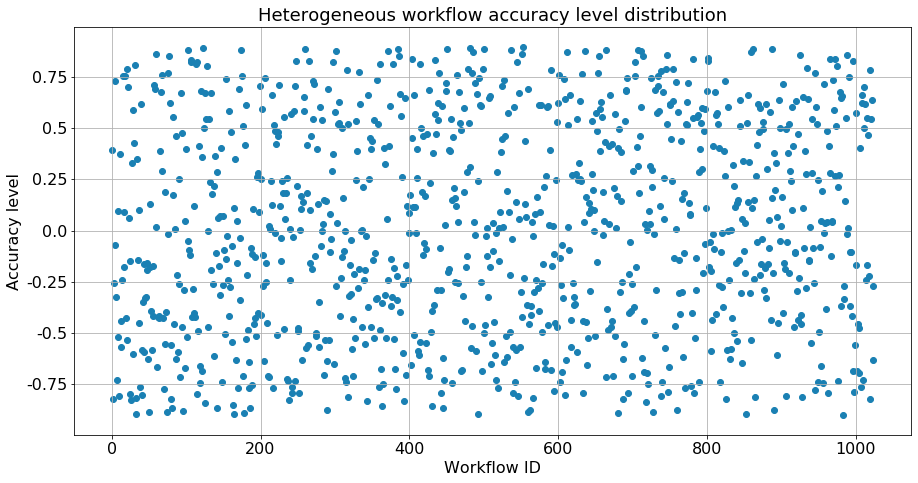

In [7]:
test = StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_90perc.loc[899]['AccuracyList']
accur = eval(test)
fig, axis = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(15,7.5)
_ = axis.scatter(range(1,1025), accur,color=tableau20(0))
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=16)
_ = axis.set_yticklabels(np.around(axis.get_yticks().astype('float'),decimals=2).tolist(),fontsize=16)
_ = axis.set_xlabel('Workflow ID', fontsize=16)
_ = axis.set_ylabel('Accuracy level', fontsize=16)
_ = axis.grid('on')
_ = axis.set_title('Heterogeneous workflow accuracy level distribution', fontsize=18)

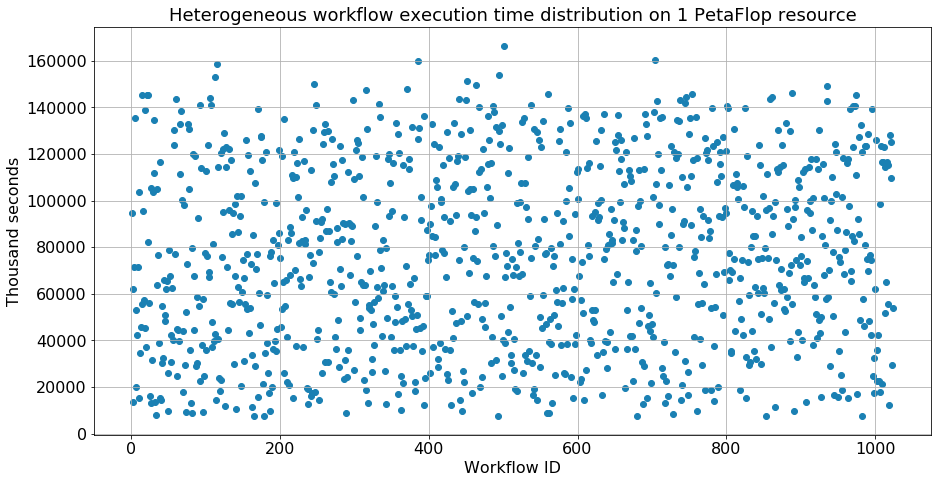

In [8]:
final_workflows = [x*(1+y) for x,y in zip(workflows['num_oper'], accur)]
fig, axis = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(15,7.5)
_ = axis.scatter(range(1,1025),final_workflows,color=tableau20(0))
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=16)
_ = axis.set_yticklabels((axis.get_yticks()).astype('int').tolist(),fontsize=16)
_ = axis.set_xlabel('Workflow ID', fontsize=16)
_ = axis.set_ylabel('Thousand seconds', fontsize=16)
_ = axis.grid('on')
_ = axis.set_title('Heterogeneous workflow execution time distribution on 1 PetaFlop resource', fontsize=18)

In [9]:
def get_makespan(curr_plan, dyn_resources, used_resources, workflow_inaccur):
    '''
    Calculate makespan
    '''
    inaccur_list = []
    resource_usage = [0] * len(dyn_resources)
    tmp_idx = [0] * len(dyn_resources)
    for placement in curr_plan:
        workflow = placement[0]
        resource_id = placement[1]['id']
        perf = used_resources[resource_id - 1]['performance']
        resource_usage[resource_id - 1] += workflow['num_oper'] / perf
        #resource_usage[resource_id - 1] += workflow['num_oper'] / \
        #                                   dyn_resources[resource_id - 1,
        #                                                 tmp_idx[resource_id - 1]]
        
        tmp_idx[resource_id - 1] += 1

    return max(resource_usage)

In [10]:
resources = [{'id': 1, 'performance': 1.3},
             {'id': 2, 'performance': 2.76},
             {'id': 3, 'performance': 10.68},
             {'id': 4, 'performance': 23.516}]
expected_makespan = get_makespan(eval(StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_90perc.loc[899]['plan']),[1,1,1,1],resources,None)


In [11]:
print (expected_makespan, StHeteroCampaigns_4DynHeteroResourcesHEFT_inaccur_90perc.loc[899]['makespan'])

2012662.536056654 2084997.0520677224


In [23]:
work1=workflows.loc[0]['num_oper']
work2=workflows.loc[1]['num_oper']
work3=workflows.loc[2]['num_oper']
work4=workflows.loc[3]['num_oper']
work5=workflows.loc[4]['num_oper']

dist1=[]
dist2=[]
dist3=[]
dist4=[]
dist5=[]
dist6=[]

for _ in range(100000):
    dist1.append(uniform(work1 * .6, work1 * 1.4))
    dist2.append(uniform(work2 * .6, work2 * 1.4))
    dist3.append(uniform(work3 * .6, work3 * 1.4))
    dist4.append(uniform(work4 * .6, work4 * 1.4))
    dist5.append(uniform(work4 * .6, work4 * 1.4))
    dist6.append(dist1[-1] + dist2[-1] + dist3[-1] + dist4[-1]+dist5[-1])

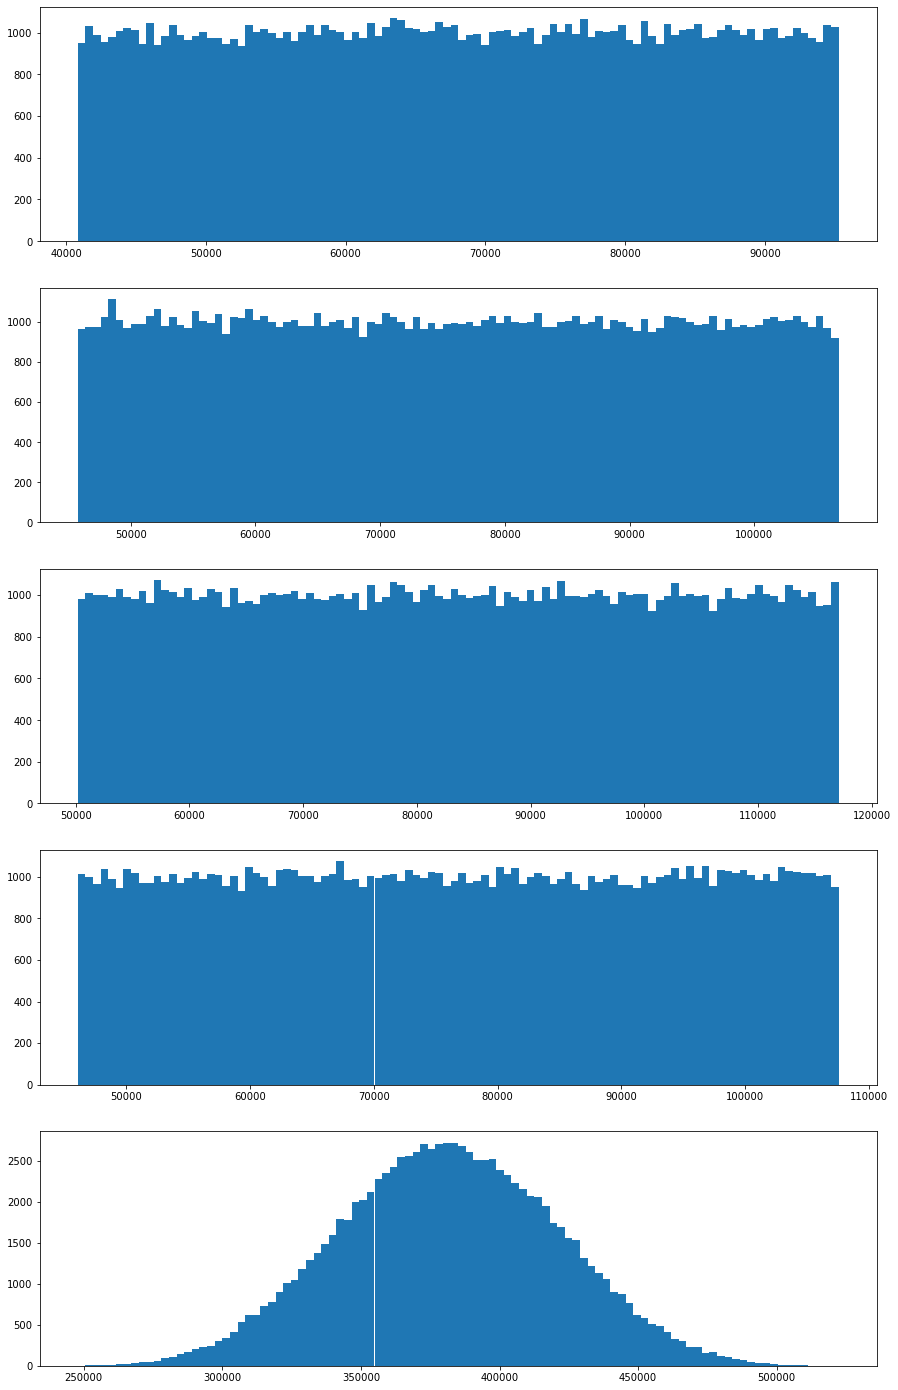

In [27]:
fig, axis = plt.subplots(nrows=5,ncols=1,figsize=(15,25))
_ = axis[0].hist(dist1, bins=100)
_ = axis[1].hist(dist2, bins=100)
_ = axis[2].hist(dist3, bins=100)
_ = axis[3].hist(dist4, bins=100)
_ = axis[4].hist(dist6, bins=100)

In [25]:
print(np.mean(dist1),np.mean(dist2),np.mean(dist3),np.mean(dist4),np.mean(dist5))

68125.39974451157 76180.85352682641 83623.74641751824 76857.37592650966 76814.48038028671


In [26]:
print(work1,work2,work3,work4,work1+work2+work3+work4)

68058.32930703841 76254.76555108582 83632.36187551905 76818.03491483296 304763.4916484762


In [32]:
import scipy
size = len(dist6)
chi_square_statistics = list()
dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang']

percentile_bins = np.linspace(0,100,11)
percentile_cutoffs = np.percentile(dist6, percentile_bins)
observed_frequency, bins = (np.histogram(dist6, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(dist6)
    print("{}\n{}\n".format(dist, param))


    # Get expected counts in percentile bins
    # cdf of fitted sistrinution across bins
    cdf_fitted = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # Chi-square Statistics
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square_statistics.append(ss)


#Sort by minimum ch-square statistics
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square_statistics
results.sort_values(['chi_square'], inplace=True)


print ('\nDistributions listed by Betterment of fit:')
print ('............................................')
print (results)

(0.07133354597943717, 247823.80886681846, 1.5790974073365198)

(381601.8559956526, 39474.66796970559)

(0.071469495332935, 522346.0436372322, 1.723146899014972)

(10.556533272110164, 10.728738864032302, 196741.14403580013, 372736.90171803744)

(468374.8639946207, 247538.27299979376, 118607.61707424113)

(247823.8088668185, 274522.23477041366)

(91602.99582359982, -11565822.051735839, 130.42612583075223)

(247823.8088668185, 133778.04712883412)

(11.91408685169649, 247823.80886681846, 2.3969879164854215)

(0.008053325486821515, 381602.08515494125, 39474.67921787081)

(0.47883516586605446, 247819.04437940934, 274531.5235516967)


Distributions listed by Betterment of fit:
............................................
   Distribution     chi_square
3          beta       2.834940
9      pearson3      46.026241
6         gamma      46.200612
1          norm      47.374893
10       triang   14739.886381
5       uniform   71988.002661
4      invgauss  118868.513488
7         expon  226474.9446